# Flag Prediction Using a Decision Tree Algortihm
### What Does It Do
This project demonstrates my knowledge of build a decision tree classifier, a supervised machine learning model. The model is used to predict the landmass in which a country is located, based on features of its flag.
### About the Data
This data was obtained from the UCI Machine Learning Repository. The data used to train and test this particular model can be found here:
* [Flags Data Set](http://archive.ics.uci.edu/ml/datasets/Flags)

## Import the Data

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
# load in the data
flags = pd.read_csv('flags.csv')

# preview data
flags.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


## Build the Decision Tree

The column the model is going to classify is `landmass`. The labels are set to this column. The colors are the features that will be used to train the model.

In [3]:
# set labels for model
labels = flags['landmass']

# set data for training set
data = flags[['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']]

In [4]:
# split data into training and test subsets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=1)

In [5]:
# create and fit decison tree classifier to training data
tree = DecisionTreeClassifier(random_state=1)
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [6]:
# check score of classifier
tree.score(test_data, test_labels)

0.38461538461538464

## Optimize the Decision Tree
This score of the first model is pretty low at just 38% accuracy. It needs to be tuned up. Iterate through a depth from 1-20 to find the strongest model depth.

In [74]:
# initialize list of model scores
scores = []

# iterate through variety of depths
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

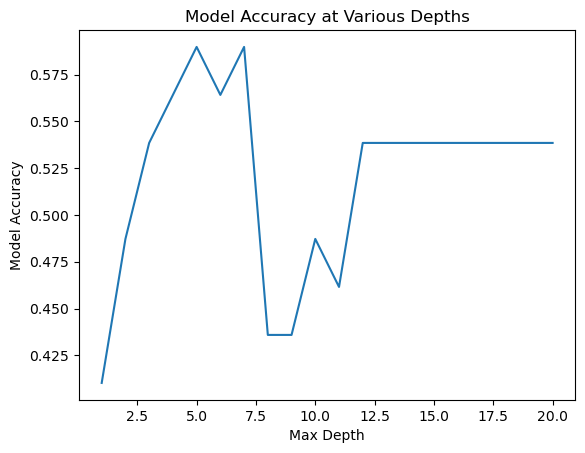

In [77]:
# plot scores at each depth
plt.plot(range(1, 21), scores)
plt.xlabel('Max Depth')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracy at Various Depths')
plt.show()

The score does not improve with additional depth, which is a sign that the tree needs more features. They are added now. In the real world, I would simply add the new features when the first instance of `data` was created, but for this project I want to show my process step-by-step to prove my knowledge of considerations when building this sort of model.

In [19]:
# add color and shape features
data = flags[["red", "green", "blue", "gold", "white", "black", "orange", "circles", "crosses", "saltires",
              "quarters", "sunstars", "crescent", "triangle"]]

In [20]:
# split new data into training and test subsets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=1)

In [21]:
# initialize list of model scores
scores = []

# iterate through variety of depths
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))

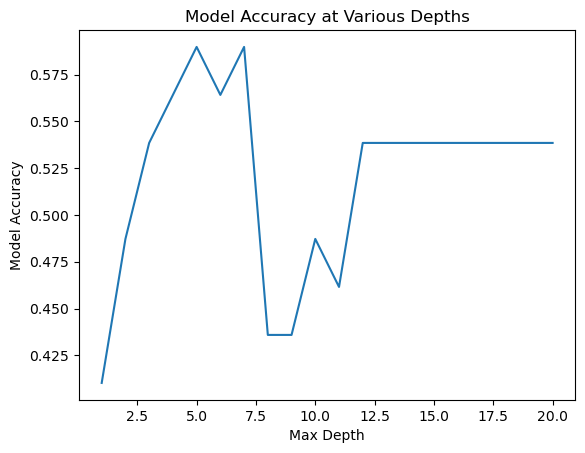

In [78]:
# plot scores at each depth
plt.plot(range(1, 21), scores)
plt.xlabel('Max Depth')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracy at Various Depths')
plt.show()

This improved the accuracy of the model, with the peak of accuracy at a depth of 4. a 56% accuracy is still not a very strong model. I will add additional features to attempt to reach an accuracy score of 70%. Instead of showing step by step, I will continue to update the data below until a satisfactory score is achieved.

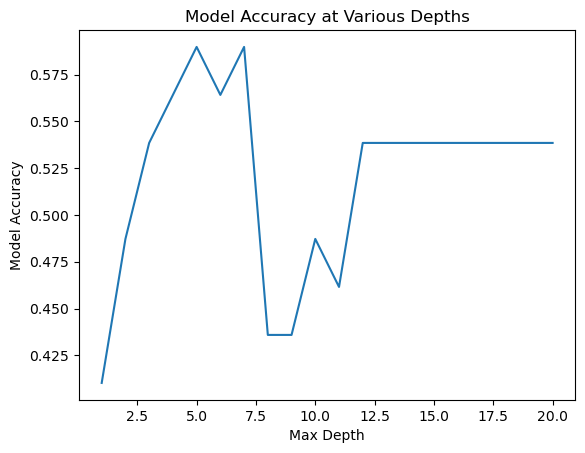

In [79]:
# set labels for model
labels = flags['landmass']

# add features
data = flags[['bars', 'stripes', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle']]

# split new data into training and test subsets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=1)

# initialize list of model scores
scores = []

# iterate through variety of depths
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))
    
# plot scores at each depth
plt.plot(range(1, 21), scores)
plt.xlabel('Max Depth')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracy at Various Depths')
plt.show()

The highest level of accuracy this model can achieve when predicting which landmass a country is located based on the appearance of its flag is about 59% at a tree depth of 5. The additional features in the dataset are not relevant to the appearance of the flags, and therefore should not be used in the model.

Additionally, adding more features increases the risk of overfitting by relying too much on the training data. Note, adding all compatible features increases the model's accuracy to 69% at a tree depth of 7, but this model is likely overfitted.